In [2]:
!pwd

/Users/ashish1610dhiman/data_projects/bestbuy/notebooks/ashish


In [5]:
import sys
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

sys.version

'3.9.15 | packaged by conda-forge | (main, Nov 22 2022, 08:55:37) \n[Clang 14.0.6 ]'

In [6]:
%load_ext autoreload 
%autoreload 2

### EDA

In [10]:
org_df = pd.read_excel("../../data/Hackathon Data.xlsx")
org_df.shape

(846632, 11)

In [11]:
org_df.columns

Index(['Encoded_SKU_ID', 'SALES_DATE', 'SUBCLASS_NAME', 'CLASS_NAME',
       'ML_NAME', 'CATEGORY_NAME', 'RETAIL_PRICE', 'PROMO_PRICE',
       'COMPETITOR_PRICE', 'Inventory', 'DAILY_UNITS'],
      dtype='object')

In [13]:
org_df["SALES_DATE"] = pd.to_datetime(org_df["SALES_DATE"])

In [20]:
sku_grp = org_df.groupby(["Encoded_SKU_ID"]).agg(
    {"DAILY_UNITS":["mean","std"],\
    "SALES_DATE":["min","max"]}
)

sku_grp.columns = ["sales_mean","sales_std","date_min","date_max"]

In [21]:
sku_grp.head()

,sales_mean,sales_std,date_min,date_max
Encoded_SKU_ID,,,,
1,2.268047,1.886818,2017-05-28,2022-07-31
2,12.576943,9.140281,2017-05-28,2022-07-31
3,2.430903,2.366147,2017-06-04,2022-07-31
4,4.520468,3.591465,2018-04-01,2022-07-31
5,4.626124,3.086124,2017-05-28,2022-07-31


### Histogram of mean sales

In [46]:
percentile = lambda x: pd.DataFrame(x.quantile(np.linspace(0.0, 1, 11)))

In [49]:
percentile(sku_grp["sales_mean"])

,sales_mean
0.0,0.612381
0.1,1.185608
0.2,1.575165
0.3,1.994330
0.4,2.691864
0.5,3.682708
0.6,4.717758
0.7,6.348868
0.8,9.623008
0.9,17.373587


In [77]:
np.corrcoef(sku_grp["sales_mean"],sku_grp["sales_std"])

array([[1.        , 0.97577833],
       [0.97577833, 1.        ]])

In [74]:
sku_grp[sku_grp["sales_mean"]>20]

,sales_mean,sales_std,date_min,date_max,date_diff_days
Encoded_SKU_ID,,,,,
24,36.776337,38.617510,2017-05-28,2022-07-31,1890
37,70.038286,201.699535,2017-05-28,2022-07-30,1889
50,46.153242,23.653159,2018-05-27,2022-07-31,1526
74,39.019126,27.481970,2018-07-29,2022-07-31,1463
97,1023.159634,1069.265521,2018-09-09,2022-07-31,1421
99,80.360656,35.206526,2017-05-28,2022-07-31,1890
124,23.190904,13.197444,2017-05-28,2022-07-31,1890
144,65.194077,39.368640,2017-05-28,2022-07-31,1890
157,53.918266,92.257069,2017-12-28,2022-07-31,1676


<AxesSubplot: >

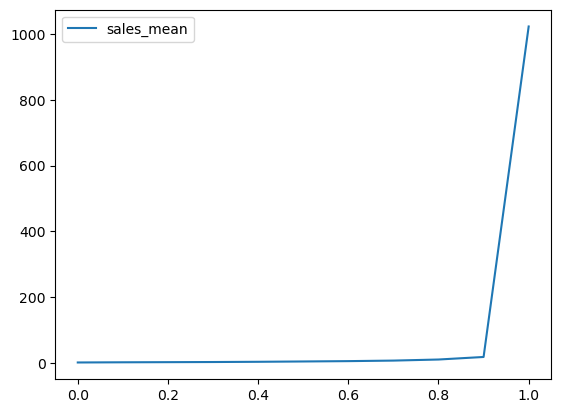

In [48]:
percentile(sku_grp["sales_mean"]).plot()

In [57]:
sku_grp["date_diff_days"] = (sku_grp["date_max"]-sku_grp["date_min"]).apply(lambda x: x.days)

<AxesSubplot: >

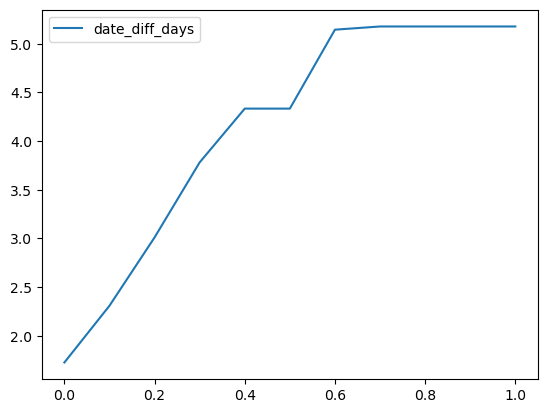

In [65]:
percentile(sku_grp["date_diff_days"]/365).plot()

In [62]:
sku_grp["date_max"].value_counts()

2022-07-31    556
2022-07-30     14
2022-07-23      2
2022-07-09      1
2022-06-25      1
2021-11-20      1
Name: date_max, dtype: int64

In [69]:
matplotlib.rcParams['figure.figsize'] = [12, 7]

In [72]:
org_df.head()

,Encoded_SKU_ID,SALES_DATE,SUBCLASS_NAME,CLASS_NAME,ML_NAME,CATEGORY_NAME,RETAIL_PRICE,PROMO_PRICE,COMPETITOR_PRICE,Inventory,DAILY_UNITS
0,1,2017-09-28,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,1
1,2,2017-11-24,CAMERA BATTERIES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,39.99,?,?,Fully-Stocked,18
2,3,2019-11-28,SO PARTS,MOBILE ACCESSORIES,ML - Connected Car,VP - Electrify & Car,49.99,?,46.98,Constrained,7
3,4,2021-04-21,SO RANGEHOODS REG,KITCHEN VENTILATION,ML - Kitchen,VP - Major Appliances,549.99,?,498,Fully-Stocked,6
4,1,2018-10-27,MISC CAMERA ACCES,DIGITAL CAMERA ACCY,ML - DI Accessories,VP - Digital Imaging,89.99,?,?,Fully-Stocked,7


<AxesSubplot: xlabel='SALES_DATE'>

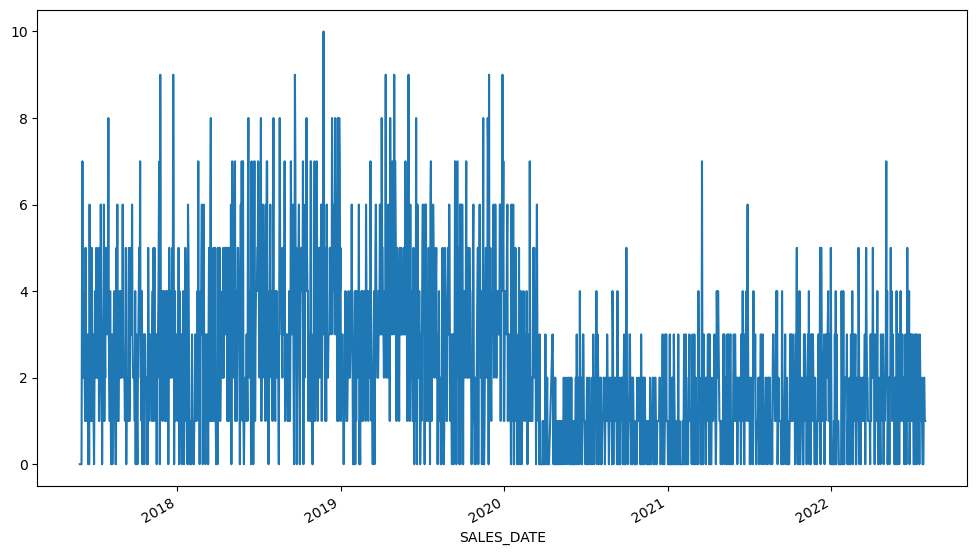

In [70]:
sku1_sales = org_df[org_df.Encoded_SKU_ID==1]
sku1_sales.index = sku1_sales.SALES_DATE
sku1_sales["DAILY_UNITS"].plot()

<AxesSubplot: xlabel='SALES_DATE'>

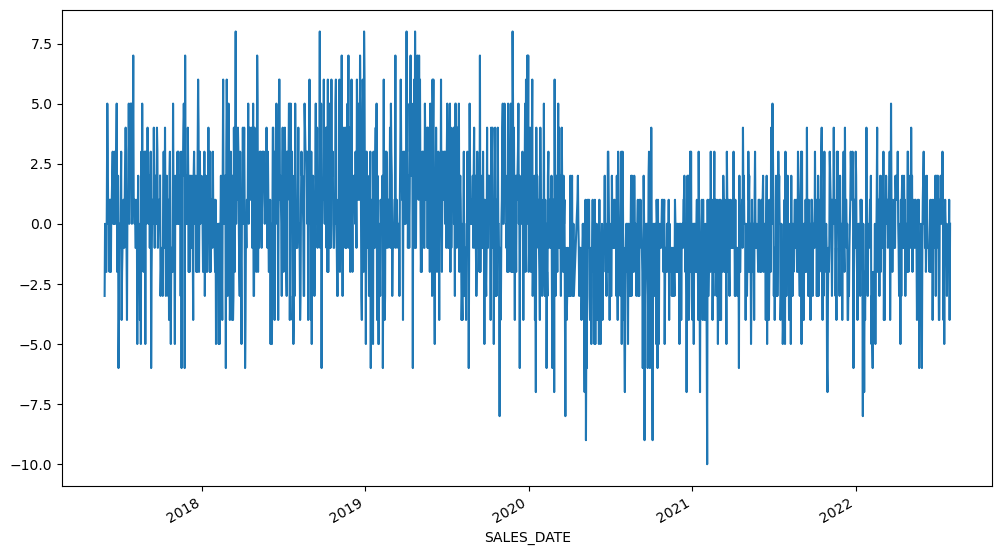

In [71]:
sku1_sales["DAILY_UNITS"].diff().plot()

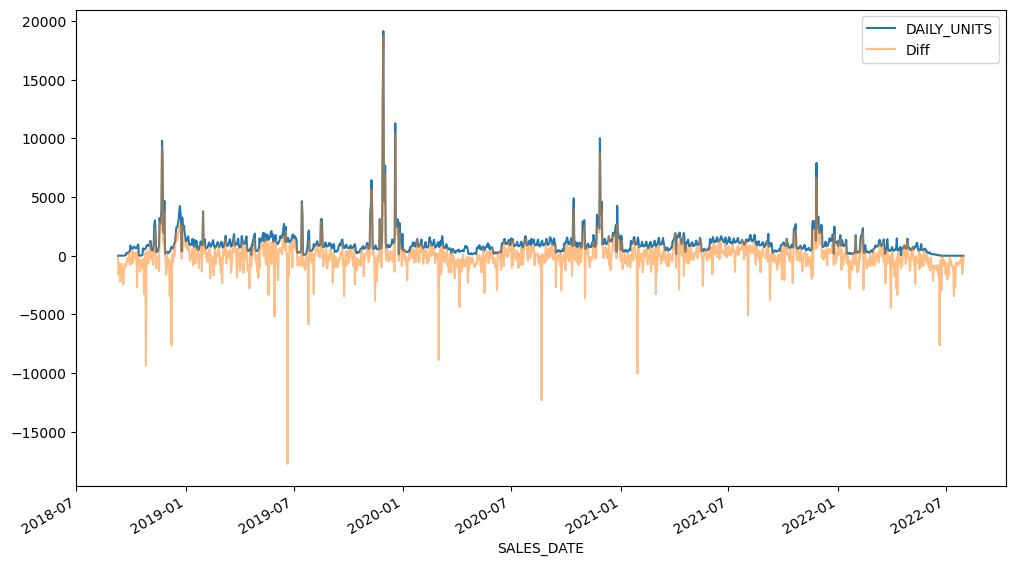

In [81]:
sku1_sales = org_df[org_df.Encoded_SKU_ID==97]
sku1_sales.index = sku1_sales.SALES_DATE
sku1_sales["DAILY_UNITS"].plot()
sku1_sales["DAILY_UNITS"].diff().plot(label = "Diff", alpha = 0.5)
plt.legend()